## Generating neut curves for all serum validations
This notebook contains analysis of all neuts run for serum validations for HK/19. Note that conditions changed over time as I was piloting these experiments:
- 230826: original test of sera 3944 and 2365, using MOI=0.75
- 230909: re-running 3944 and 2365 neuts after running an MOI test and finding that I should use less virus. Note that S145K did not return clean results, likely due to pipetting errors.
- 230923: re-running 3944, and testing 215C. This is with a second batch of rescued virus as I was running low on aliquots from the first batch. MOI appeared to be off for S145H, as curves were shifted.
- 230926: tested neut curves for 215C at different MOIs for 4 viruses. Found that curves consistently shift to the left as MOI is lowered, despite being in linear range of MOI curve. 
    - Source of this issue was unclear. Note that the WT HK/19 GFP virus used was rescued in a separate batch last year. This could be an issue, as we want titers and fluorescent signal to be relatively consistent between GFP viruses. Tried re-passaging all variants + WT from the same rescue.
- 231012: tried re-running 3944 and 215C using the new viruses, but due to a cell issue (lots of cell death in control wells), results are not reliable. Estimated fraction infectivity based on where the curves flattened out since there was no control signal for normalization.
- 231018: Successful run of 3857 and 215C with 4 variants.
- 231021: Successful run of 3856 and 4584. 
- 231025: Successful run of 3857 and 215C with remaining variants. At this point, I realized that the prior issue with 'MOI' was actually due to serum saturation for highly potent sera (215C, to a lesser extent 3944). Decided to drop 215C as it's 10x more potent than most other sera. 
- 231027: re-running 3944 with serum dilution volumes increased from 40uL to 100uL to combat saturation. Results look much more consistent with predictions than before.
- 231031: Successful run of 74C and 197C.

In [1]:
import pandas as pd

import neutcurve
from neutcurve.colorschemes import CBMARKERS, CBPALETTE

import matplotlib
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings("ignore")

### 230826

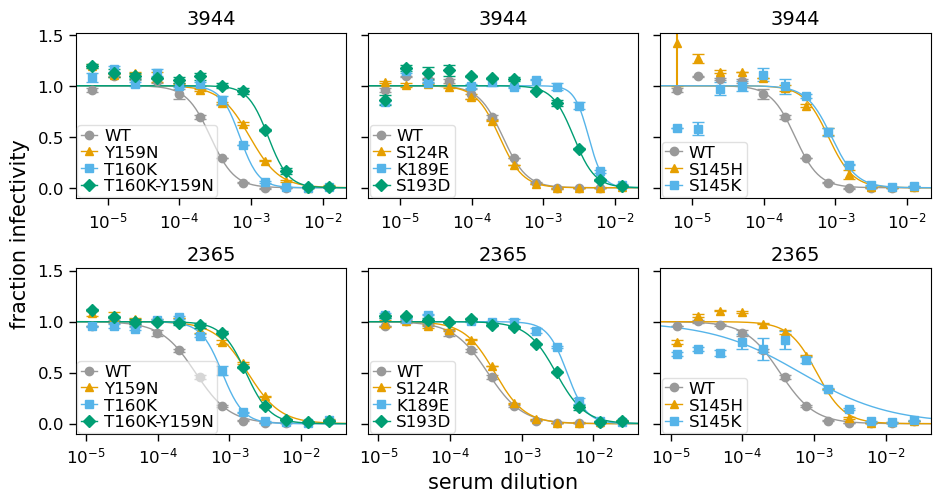

In [2]:
data = pd.read_csv('neut_data/230826_3944-2365_neuts_tidy.csv')

# replace HK19_wt with WT for correct processing with neutcurve
virus_dict = {
    'HK19_wt': 'WT',
}

data = data.replace({'virus': virus_dict})

virus_order = ['WT', 'Y159N', 'T160K', 'T160K-Y159N', 'S124R', 'K189E', 'S193D', 
               'S145H', 'S145K']

data['virus'] = pd.Categorical(data.virus, categories=virus_order, ordered=True)
data.sort_values('virus')

data = data.set_index('virus').loc[virus_order].reset_index()

# fit with neutcurve package
fits = neutcurve.CurveFits(data)

fig, axes = fits.plotSera(xlabel='serum dilution',
                          max_viruses_per_subplot=4,
                          ncol=3,
                          sharex=False
                         )

# bbox = matplotlib.transforms.Bbox([[0, 0], [10.5, 6]])
# plt.savefig('230826_3944-2365_validations.pdf', bbox_inches=bbox)

### 230909

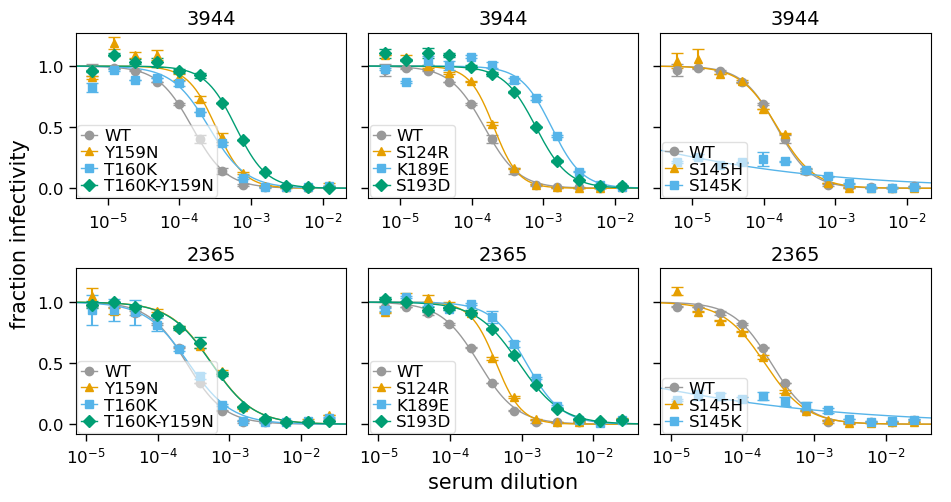

In [3]:
data = pd.read_csv('neut_data/230909_neuts_tidy.csv')

# replace HK19_wt with WT for correct processing with neutcurve
virus_dict = {
    'HK19_wt': 'WT',
}

data = data.replace({'virus': virus_dict})

virus_order = ['WT', 'Y159N', 'T160K', 'T160K-Y159N', 'S124R', 'K189E', 'S193D', 
               'S145H', 'S145K']

data['virus'] = pd.Categorical(data.virus, categories=virus_order, ordered=True)
data.sort_values('virus')

data = data.set_index('virus').loc[virus_order].reset_index()

# fit with neutcurve package
fits = neutcurve.CurveFits(data)

fig, axes = fits.plotSera(xlabel='serum dilution',
                          max_viruses_per_subplot=4,
                          ncol=3,
                          sharex=False
                         )

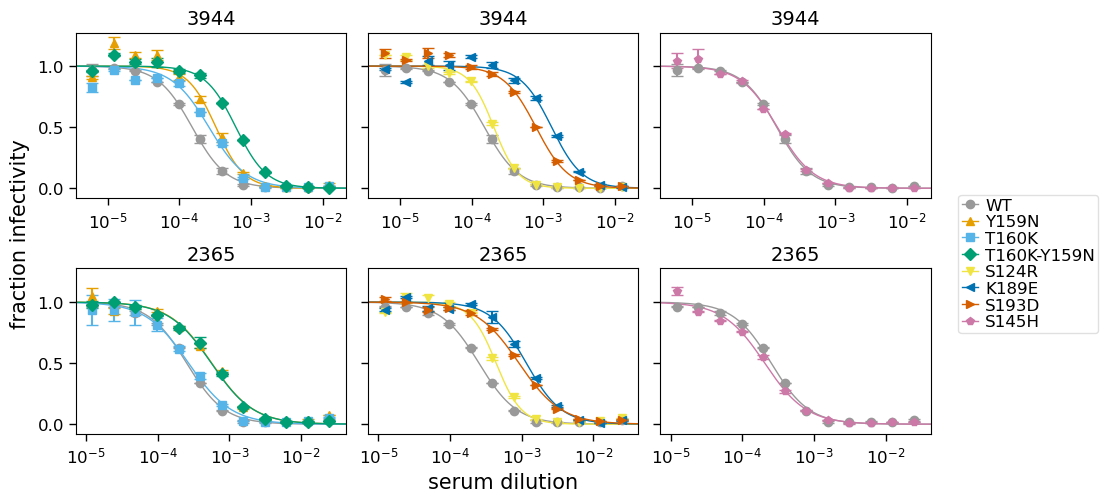

In [4]:
# drop S145K
data = data.loc[data['virus'] != 'S145K']

# fit with neutcurve package
fits = neutcurve.CurveFits(data)

fig, axes = fits.plotSera(xlabel='serum dilution',
                          max_viruses_per_subplot=4,
                          ncol=3,
                          sharex=False
                         )

# bbox = matplotlib.transforms.Bbox([[0, 0], [10.5, 6]])
# plt.savefig('230909_3944-2365_validations.pdf', bbox_inches=bbox)

### 230923

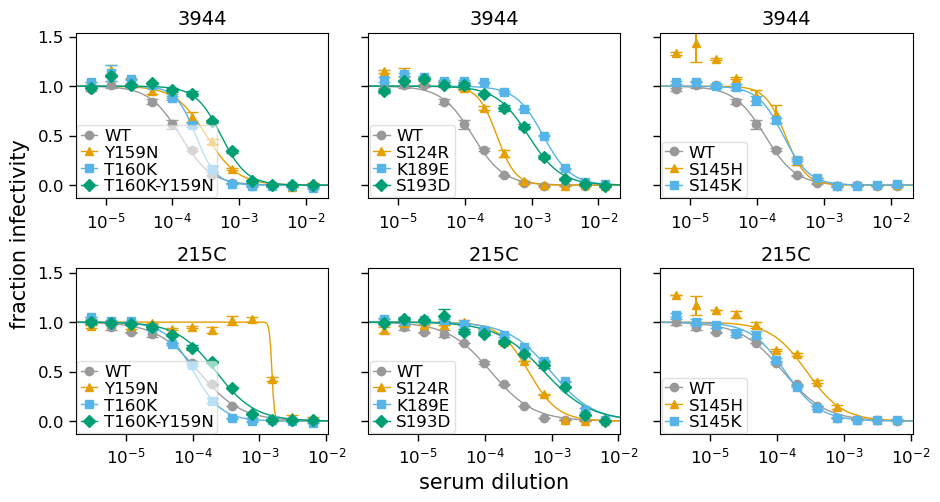

In [5]:
data = pd.read_csv('neut_data/230923_neuts_tidy.csv')

virus_order = ['WT', 'Y159N', 'T160K', 'T160K-Y159N', 'S124R', 'K189E', 'S193D', 
               'S145H', 'S145K']

data['virus'] = pd.Categorical(data.virus, categories=virus_order, ordered=True)
data.sort_values('virus')

data = data.set_index('virus').loc[virus_order].reset_index()

# fit with neutcurve package
fits = neutcurve.CurveFits(data)

fig, axes = fits.plotSera(xlabel='serum dilution',
                          max_viruses_per_subplot=4,
                          ncol=3,
                          sharex=False
                         )

# bbox = matplotlib.transforms.Bbox([[0, 0], [10.5, 6]])
# plt.savefig('230923_3944-215C_validations.pdf', bbox_inches=bbox)

### 230926 - neuts at different MOIs

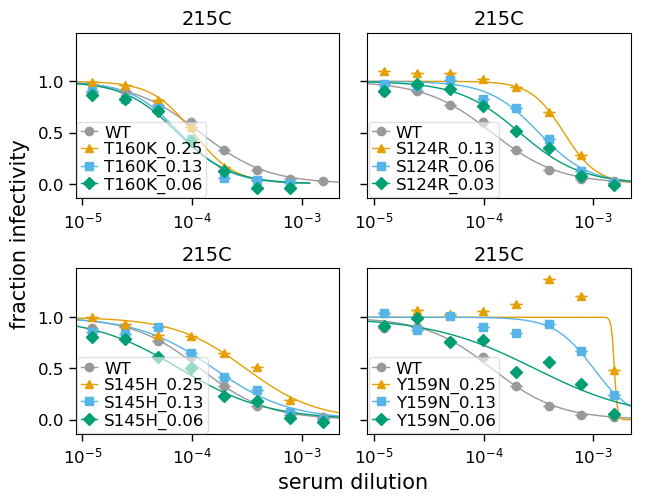

In [6]:
data = pd.read_csv('neut_data/230926_moi-curves-tidy_test.csv')

# duplicate df so that there are replicates for neutcurve plotting
data_2 = data.copy()
data_2['replicate'] = 2
data = pd.concat([data, data_2])

# plot separately
data_215C = data.loc[data['serum'] != '3944']

# fit with neutcurve package
fits = neutcurve.CurveFits(data_215C)

fig, axes = fits.plotSera(xlabel='serum dilution',
                          max_viruses_per_subplot=4,
                          ncol=2,
                          sharex=False
                         )

# bbox = matplotlib.transforms.Bbox([[0, 0], [7.5, 5.5]])
# plt.savefig('230926_moi-curves_215C.pdf', bbox_inches=bbox)

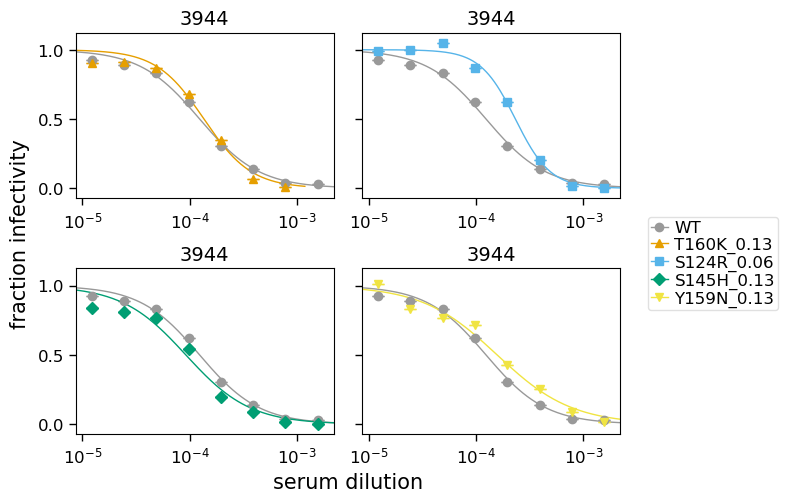

In [7]:
data_3944 = data.loc[data['serum'] != '215C']

# fit with neutcurve package
fits = neutcurve.CurveFits(data_3944)

fig, axes = fits.plotSera(xlabel='serum dilution',
                          max_viruses_per_subplot=2,
                          ncol=2,
                          sharex=False
                         )

# bbox = matplotlib.transforms.Bbox([[0, 0], [9, 5.5]])
# plt.savefig('230926_moi-curves_3944.pdf', bbox_inches=bbox)

### 231012

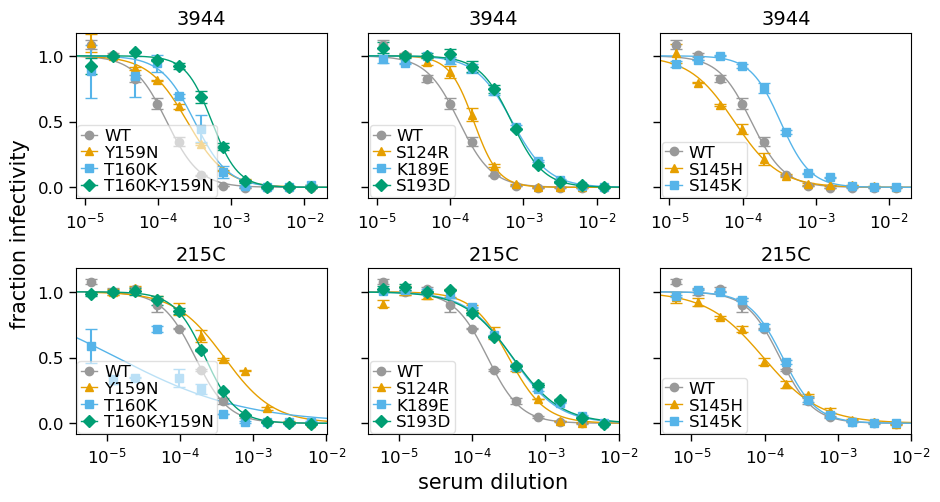

In [8]:
data = pd.read_csv('neut_data/231012_neuts-tidy.csv')

virus_order = ['WT', 'Y159N', 'T160K', 'T160K-Y159N', 'S124R', 'K189E', 'S193D', 
               'S145H', 'S145K']

data['virus'] = pd.Categorical(data.virus, categories=virus_order, ordered=True)
data.sort_values('virus')

data = data.set_index('virus').loc[virus_order].reset_index()

# fit with neutcurve package
fits = neutcurve.CurveFits(data)

fig, axes = fits.plotSera(xlabel='serum dilution',
                          max_viruses_per_subplot=4,
                          ncol=3,
                          sharex=False
                         )

# bbox = matplotlib.transforms.Bbox([[0, 0], [10.5, 6]])
# plt.savefig('231012_3944-215C_validations.pdf', bbox_inches=bbox)

### 231018

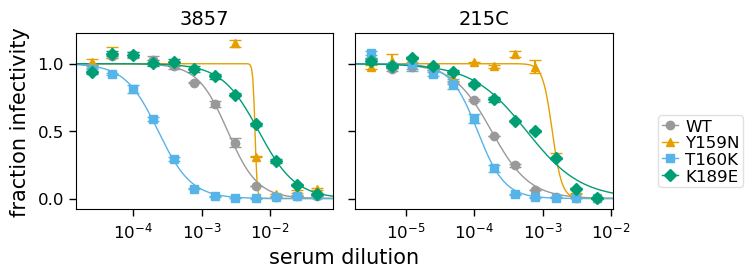

In [9]:
data = pd.read_csv('neut_data/231018_neuts-tidy.csv')

virus_order = ['WT', 'Y159N', 'T160K', 'K189E']

data['virus'] = pd.Categorical(data.virus, categories=virus_order, ordered=True)
data.sort_values('virus')

data = data.set_index('virus').loc[virus_order].reset_index()

# data_230923 = data_230923.loc[data_230923['virus'] != 'S145H']

# fit with neutcurve package
fits = neutcurve.CurveFits(data)

fig, axes = fits.plotSera(xlabel='serum dilution',
                          max_viruses_per_subplot=4,
                          ncol=3,
                          sharex=False
                         )

# bbox = matplotlib.transforms.Bbox([[0, 0], [9, 3.2]])
# plt.savefig('231018_3857-215C_part1.pdf', bbox_inches=bbox)

### 231021

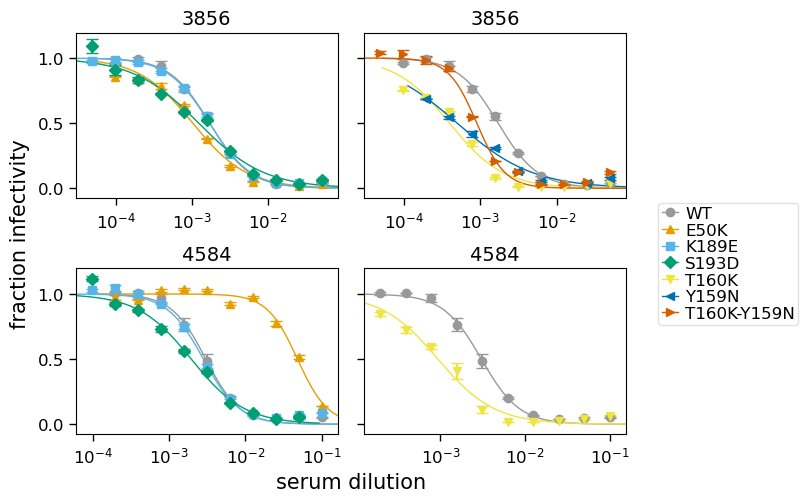

In [10]:
data = pd.read_csv('neut_data/231021_3856-4584_tidy.csv')

virus_order = ['WT', 'E50K', 'K189E', 'S193D', 'T160K', 'Y159N', 'T160K-Y159N']

data['virus'] = pd.Categorical(data.virus, categories=virus_order, ordered=True)
data.sort_values('virus')

data = data.set_index('virus').loc[virus_order].reset_index()

# fit with neutcurve package
fits = neutcurve.CurveFits(data)

fig, axes = fits.plotSera(xlabel='serum dilution',
                          max_viruses_per_subplot=4,
                          ncol=2,
                          sharex=False
                         )

# bbox = matplotlib.transforms.Bbox([[0, 0], [9, 5.5]])
# plt.savefig('231018_3856-4584_validations.pdf', bbox_inches=bbox)

### 231023

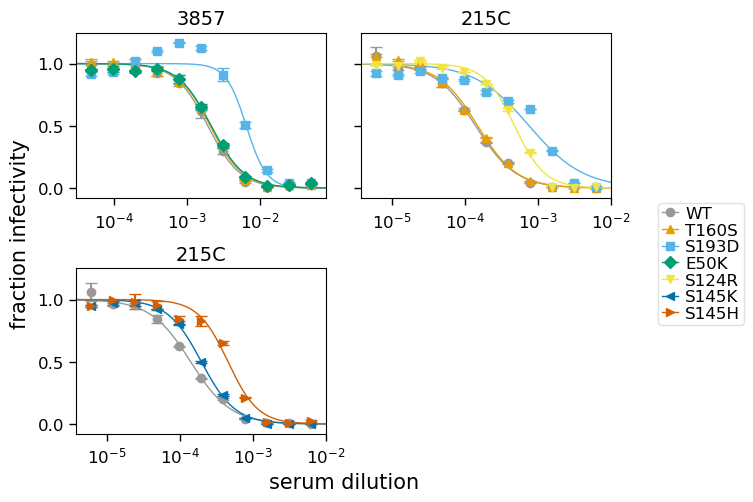

In [11]:
data = pd.read_csv('neut_data/231023_neuts_tidy.csv')

# fit with neutcurve package
fits = neutcurve.CurveFits(data)

fig, axes = fits.plotSera(xlabel='serum dilution',
                          max_viruses_per_subplot=4,
                          ncol=2,
                          sharex=False
                         )

# bbox = matplotlib.transforms.Bbox([[0, 0], [9, 6]])
# plt.savefig('231023_3857-215C_part2.pdf', bbox_inches=bbox)

### 231027

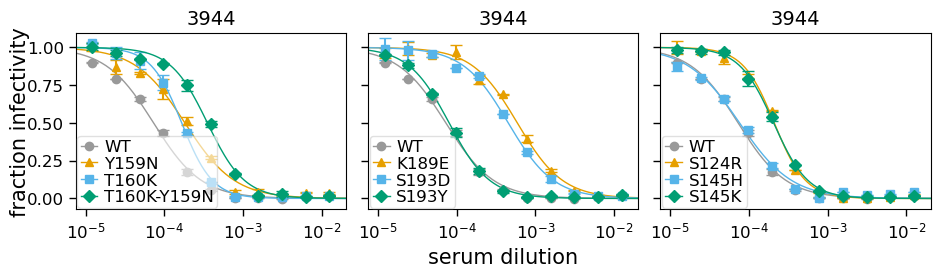

In [12]:
data = pd.read_csv('neut_data/231027_neuts-tidy.csv')

# drop edge well datapoint
data = data[data['concentration'] > 1e-5]

virus_order = ['WT', 'Y159N', 'T160K', 'T160K-Y159N', 'K189E', 'S193D', 'S193Y', 'S124R', 'S145H', 'S145K']

data['virus'] = pd.Categorical(data.virus, categories=virus_order, ordered=True)
data.sort_values('virus')

data = data.set_index('virus').loc[virus_order].reset_index()

# fit with neutcurve package
fits = neutcurve.CurveFits(data)

fig, axes = fits.plotSera(xlabel='serum dilution',
                          max_viruses_per_subplot=4,
                          ncol=3,
                          sharex=False
                         )

# bbox = matplotlib.transforms.Bbox([[0, 0], [10, 3.2]])
# plt.savefig('231027_3944.pdf', bbox_inches=bbox)

### 231031

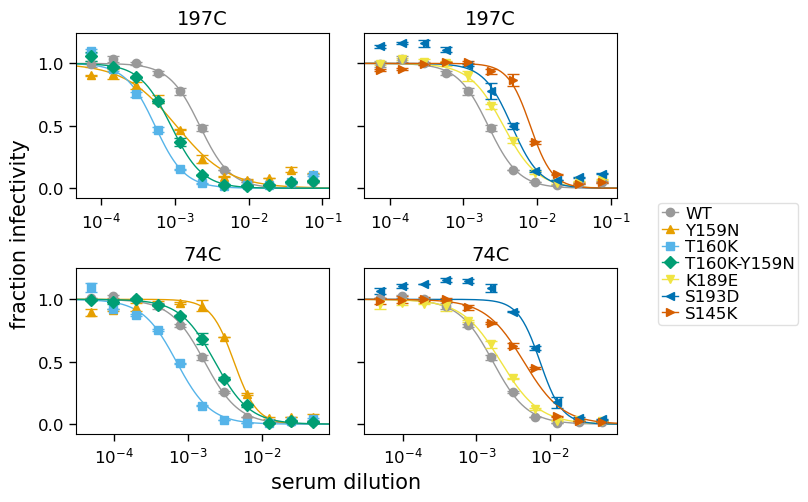

In [13]:
data = pd.read_csv('neut_data/231031_neuts_tidy.csv')

data = data.loc[data['virus'] != 'S124R']

virus_order = ['WT', 'Y159N', 'T160K', 'T160K-Y159N', 'K189E', 'S193D', 'S145K']

data['virus'] = pd.Categorical(data.virus, categories=virus_order, ordered=True)
data.sort_values('virus')

data = data.set_index('virus').loc[virus_order].reset_index()

# fit with neutcurve package
fits = neutcurve.CurveFits(data)

fig, axes = fits.plotSera(xlabel='serum dilution',
                          max_viruses_per_subplot=4,
                          ncol=2,
                          sharex=False
                         )

# bbox = matplotlib.transforms.Bbox([[0, 0], [10, 3.2]])
# plt.savefig('231027_3944.pdf', bbox_inches=bbox)